### Perform EDA and build a model to predict loan default
1.	Perform data cleaning
2.	Deal with missing and duplicate values
3.	Perform Exploratory data analysis
4.	Perform data preprocessing
5.	Select best features for training the model (Feature engineering)
6. Train the model using several classification models and find the best model suitable for the problem
7.	Evaluate the model using various classification evaluation metrics


### Data preparing and cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Loan_Default.csv")
data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
data.nunique()

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

In [6]:
print("Loan limit : ",data["loan_limit"].unique())
print("Gender : ",data["Gender"].unique())
print("loan_type : ",data["loan_type"].unique())
print("loan_purpose : ",data["loan_purpose"].unique())
print("Credit_Worthiness : ",data["Credit_Worthiness"].unique())
print("open_credit : ",data["open_credit"].unique())
print("Neg_ammortization : ",data["Neg_ammortization"].unique())
print("interest_only : ",data["interest_only"].unique())
print("lump_sum_payment : ",data["lump_sum_payment"].unique())
print("construction_type : ",data["construction_type"].unique())
print("occupancy_type : ",data["occupancy_type"].unique())
print("Secured_by : ",data["Secured_by"].unique())
print("total_units : ",data["total_units"].unique())
print("credit_type : ",data["credit_type"].unique())
print("co-applicant_credit_type : ",data["co-applicant_credit_type"].unique())
print("age : ",data["age"].unique())
print("submission_of_application : ",data["submission_of_application"].unique())
print("Region : ",data["Region"].unique())
print("Security_Type : ",data["Security_Type"].unique())
print("Status : ",data["Status"].unique())
print("dtir1 : ",data["dtir1"].unique())
print("term : ",data["term"].unique())
print("rate_of_interest : ",data["rate_of_interest"].unique())
print("loan_amount : ",data["loan_amount"].unique())


Loan limit :  ['cf' nan 'ncf']
Gender :  ['Sex Not Available' 'Male' 'Joint' 'Female']
loan_type :  ['type1' 'type2' 'type3']
loan_purpose :  ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness :  ['l1' 'l2']
open_credit :  ['nopc' 'opc']
Neg_ammortization :  ['not_neg' 'neg_amm' nan]
interest_only :  ['not_int' 'int_only']
lump_sum_payment :  ['not_lpsm' 'lpsm']
construction_type :  ['sb' 'mh']
occupancy_type :  ['pr' 'sr' 'ir']
Secured_by :  ['home' 'land']
total_units :  ['1U' '2U' '3U' '4U']
credit_type :  ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type :  ['CIB' 'EXP']
age :  ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]
submission_of_application :  ['to_inst' 'not_inst' nan]
Region :  ['south' 'North' 'central' 'North-East']
Security_Type :  ['direct' 'Indriect']
Status :  [1 0]
dtir1 :  [45. nan 46. 42. 39. 40. 44. 30. 36. 51. 20. 31.  6. 35. 34. 49. 37. 41.
 38. 56. 23. 28. 11. 27. 55. 22. 24. 52. 33. 26. 47. 60. 25. 32. 10. 15.
 53.  7. 19. 48. 59. 57.  9. 50. 21. 58.

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [9]:
data.columns=data.columns.str.lower() # converted all column names to lowercase letters.

## Performing EDA

In [10]:
data.age.value_counts()

45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64

In [11]:
print("Percentage of applicants below age 25 : ",round((1337/len(data))*100,2))

Percentage of applicants below age 25 :  0.9


In [12]:
data.gender.value_counts()

Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: gender, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

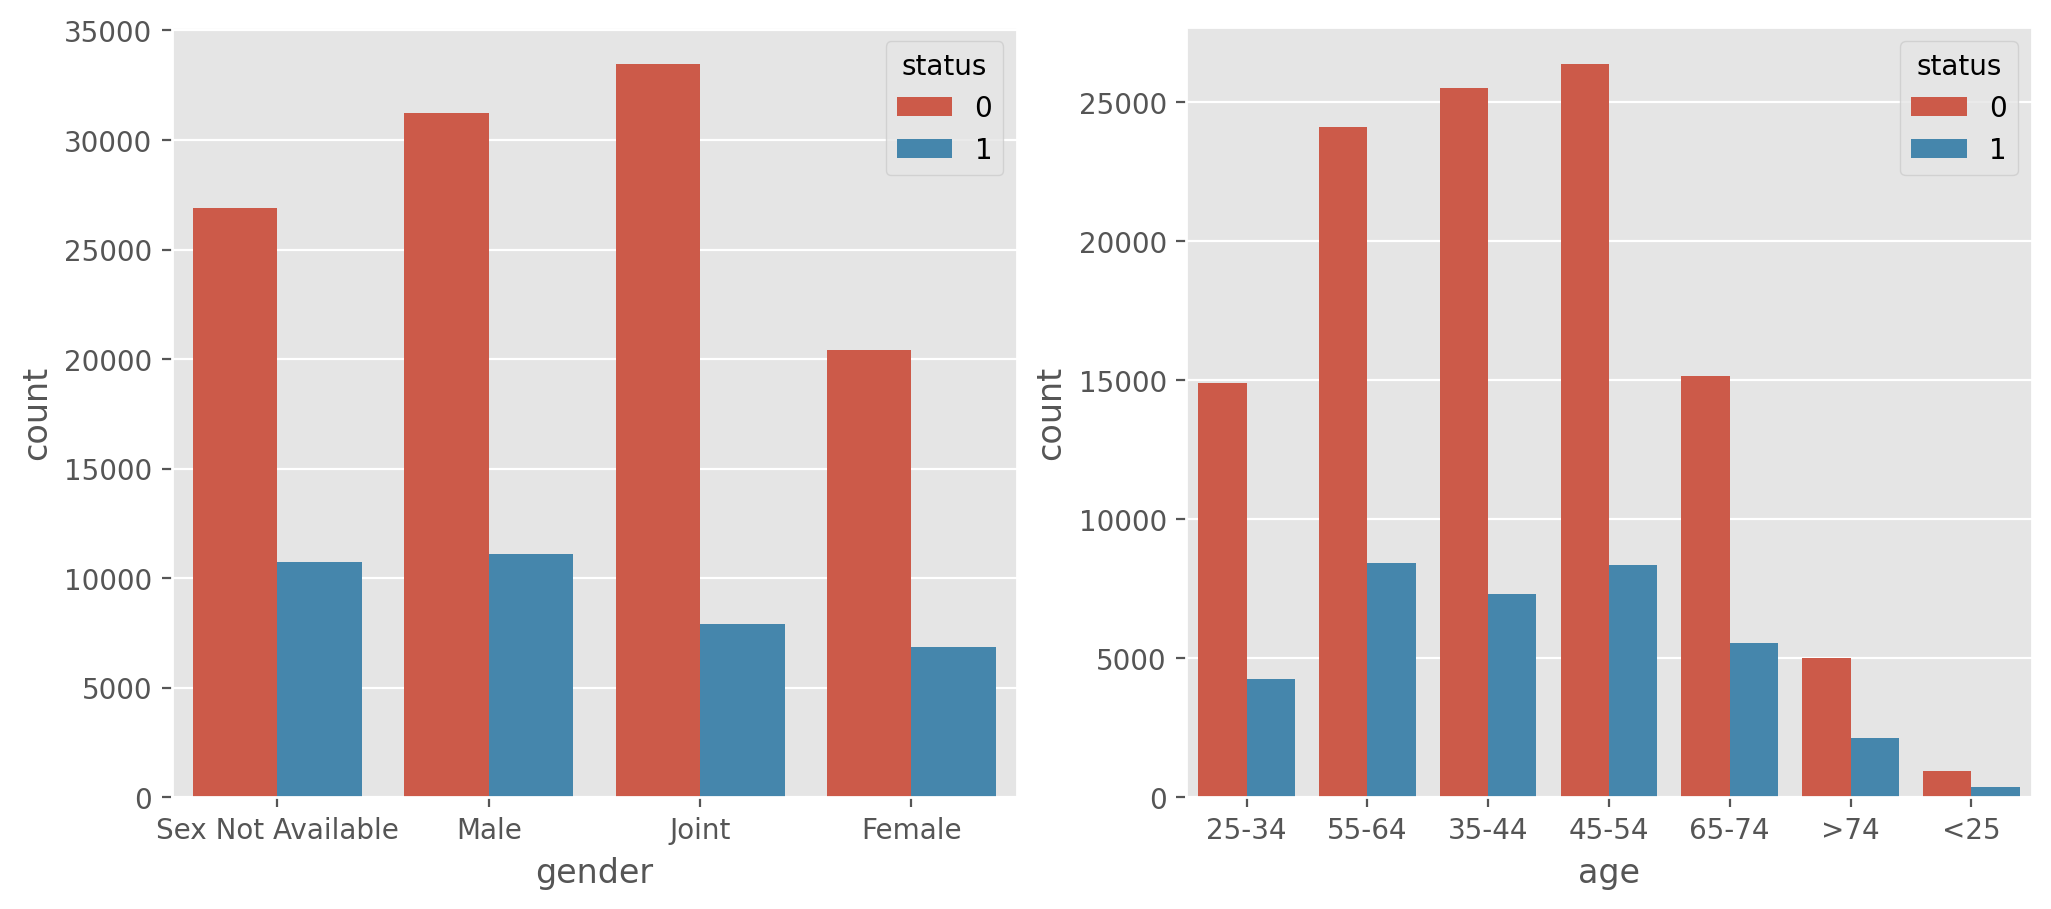

In [13]:
plt.figure(figsize=(12,5),dpi=200)

plt.subplot(1,2,1)
sns.countplot("gender",hue="status",data=data)

plt.subplot(1,2,2)
sns.countplot("age",hue="status",data=data)

## ==========================================================================
### Age of applicants :
- The majority of the loan applicants are in the age range between 35 and 65.
- only less than 1% of total applicants are below age 25
- Gender had not much effect on the approval of loans

In [14]:
x=data.region.value_counts()
x

North         74722
south         64016
central        8697
North-East     1235
Name: region, dtype: int64

In [15]:
y=data[data["status"]==1]["region"].value_counts()
y

south         17047
North         16821
central        2395
North-East      376
Name: region, dtype: int64

In [16]:
approved_perc=(y/x)*100
approved_perc

North         22.511442
North-East    30.445344
central       27.538232
south         26.629280
Name: region, dtype: float64

<AxesSubplot:xlabel='region', ylabel='count'>

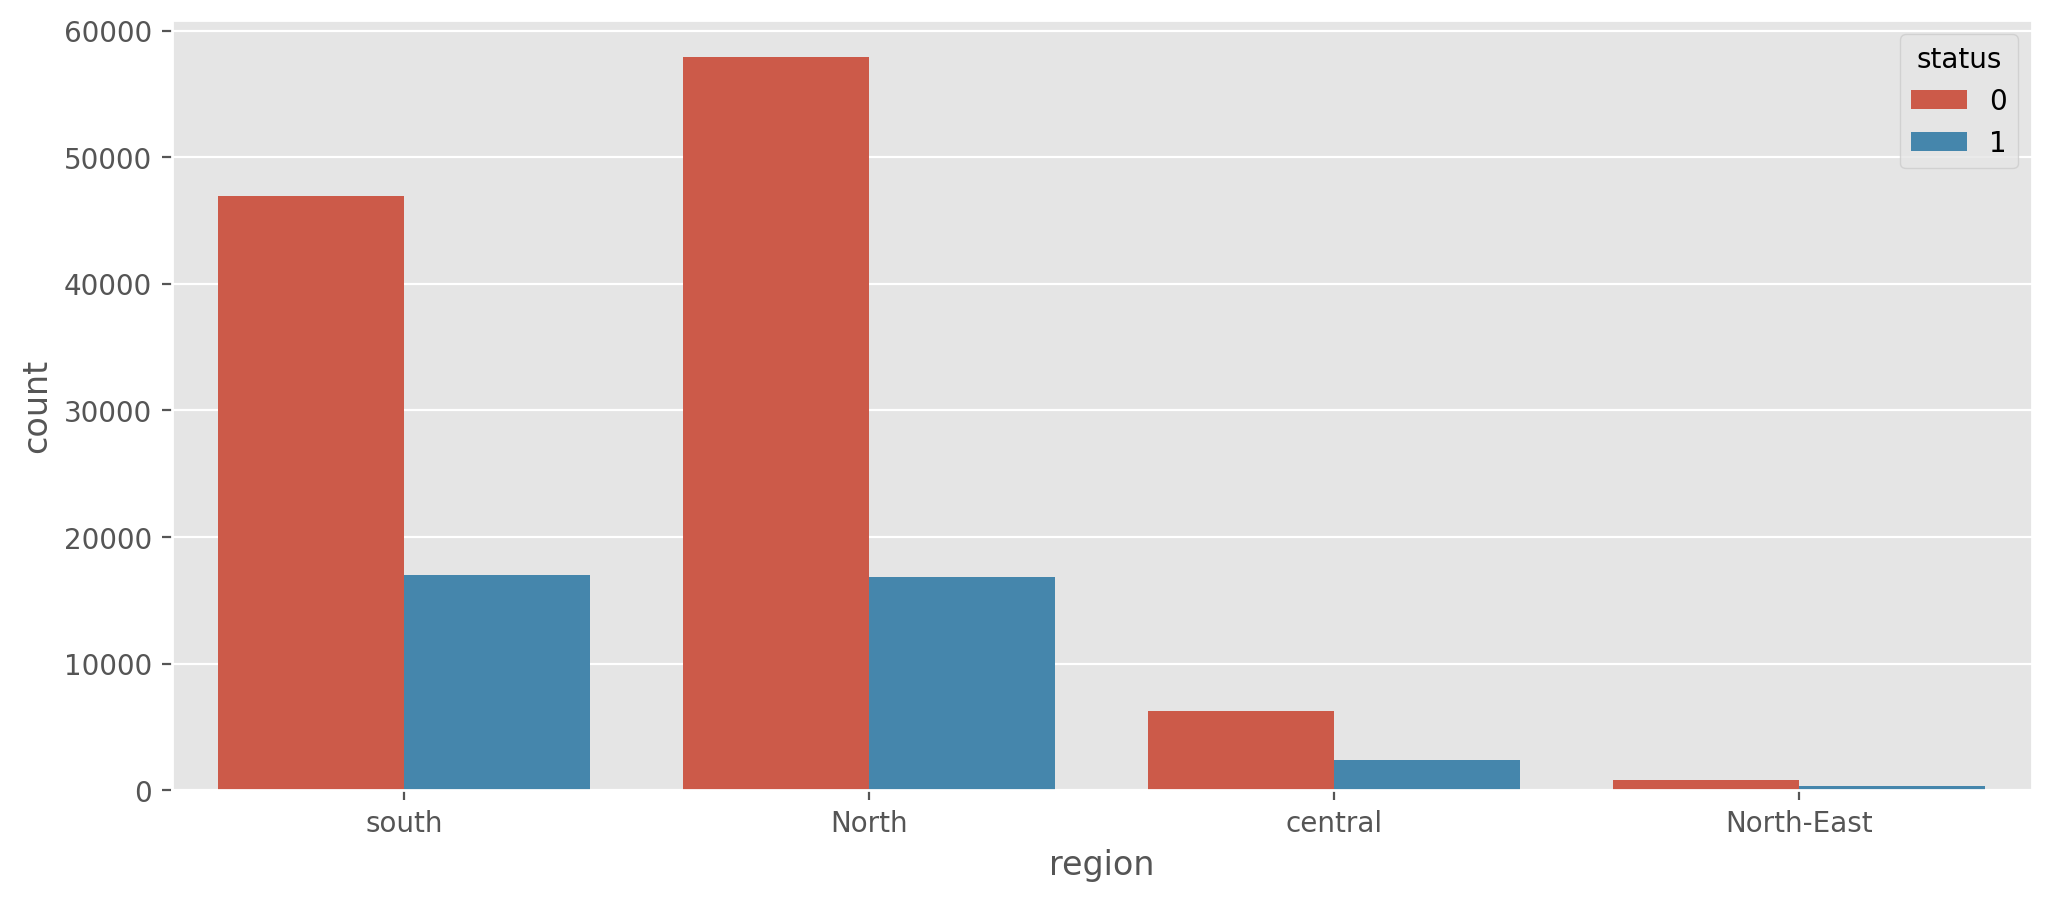

In [17]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(data.region,hue=data.status)

## ==========================================================================
### Region :
- More than 50% of the applicants are from the North region 
- South region is having the second highest loan applicants. 
- A very few applicants are from the North-East region.
- Region has not much impact on the approval of loans as all the regions have around 20-30% of loans approved from the total 
  applications.

In [18]:
data["secured_by"].value_counts()

home    148637
land        33
Name: secured_by, dtype: int64

In [19]:
data["security_type"].value_counts()

direct      148637
Indriect        33
Name: security_type, dtype: int64

<AxesSubplot:xlabel='secured_by', ylabel='count'>

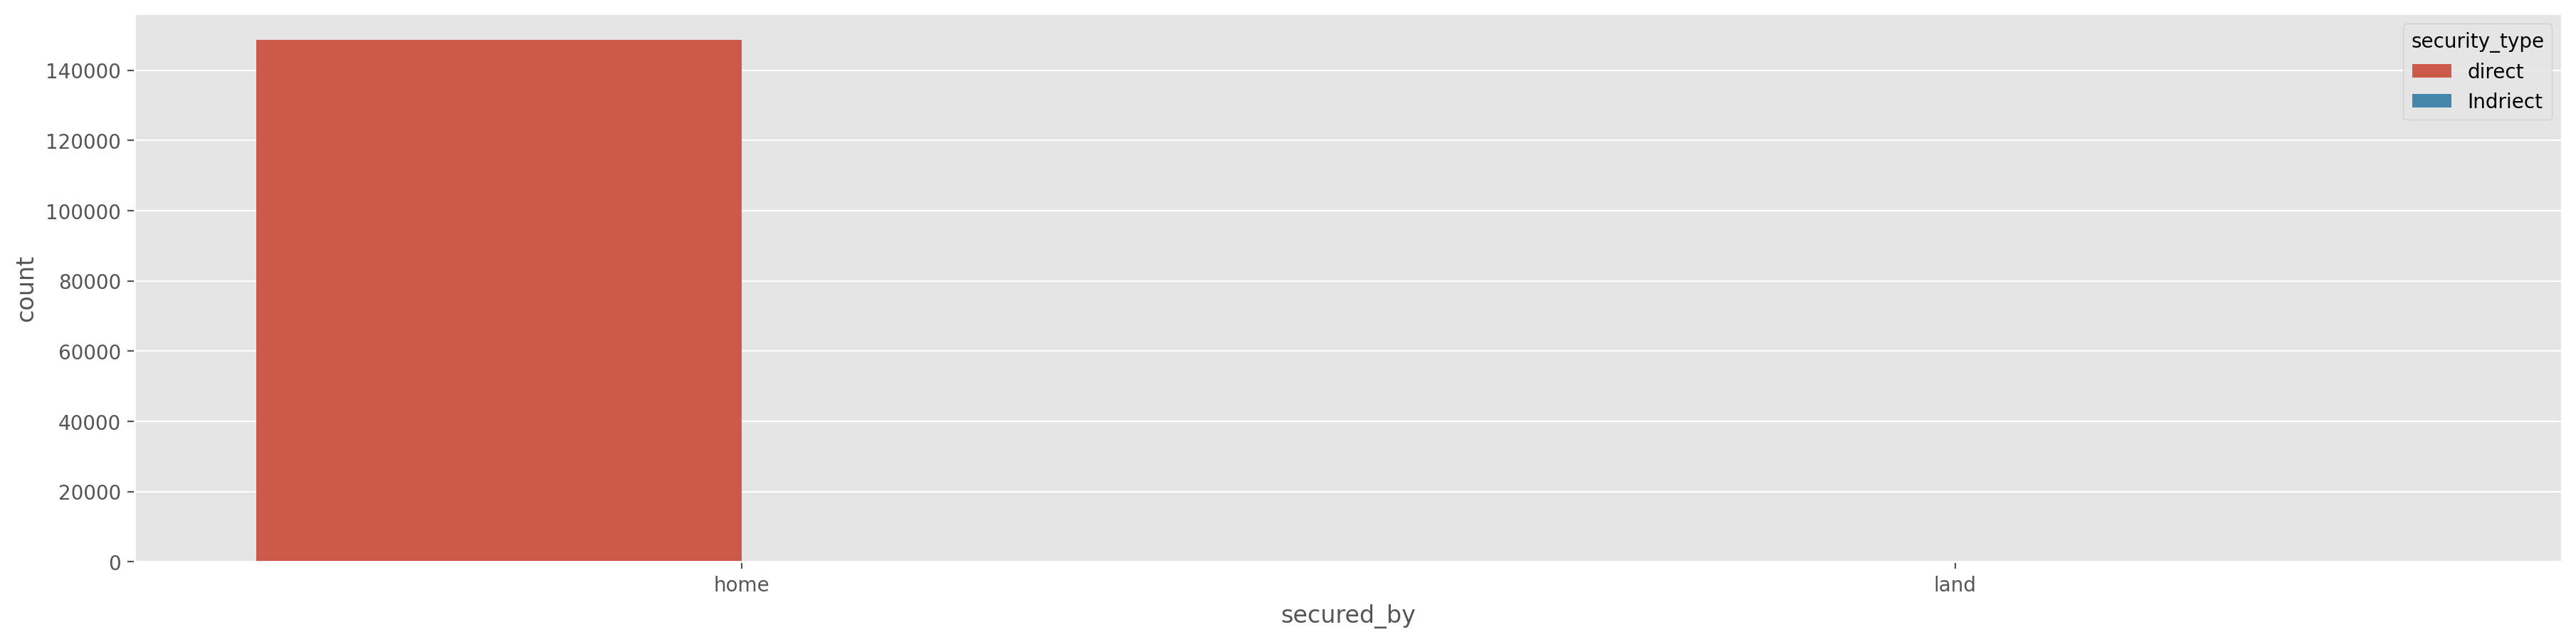

In [20]:
plt.figure(figsize=(22,5),dpi=200)
sns.countplot(data["secured_by"],hue=data["security_type"])

## ==========================================================================

### Secured by and security type:
- Here most of the applicants has pledged their home as a direct security.
- very few applicants provided indirect security in the form of land

In [21]:
approved_loan=data[["loan_amount","status"]][data["status"]==1]
print("Maximum loan amount approved : ",approved_loan.max())
print("Minimum loan amount approved : ",approved_loan.min())

Maximum loan amount approved :  loan_amount    3576500
status               1
dtype: int64
Minimum loan amount approved :  loan_amount    16500
status             1
dtype: int64


In [22]:
data.status.value_counts()

0    112031
1     36639
Name: status, dtype: int64

In [23]:
print("Percentage of total loan applications approved : ",round((36639/len(data))*100,2))

Percentage of total loan applications approved :  24.64


In [24]:
data["rate_of_interest"].isnull().sum()

36439

In [25]:
data["rate_of_interest"]=data["rate_of_interest"].fillna(data["rate_of_interest"].mean())

In [26]:
data["rate_of_interest"].isnull().sum()

0

In [27]:
print("Highest interest rate for the loan approved : ",data[data["status"]==1]["rate_of_interest"].max())
print("Lowest interest rate for the loan approved  : ",data[data["status"]==1]["rate_of_interest"].min())
print("Average interest rate for the loan approved : ",data[data["status"]==1]["rate_of_interest"].mean())

Highest interest rate for the loan approved :  5.5
Lowest interest rate for the loan approved  :  3.125
Average interest rate for the loan approved :  4.047140829040779


In [28]:
data["loan_type"].value_counts()

type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64

In [29]:
data["loan_purpose"].value_counts()

p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64

In [30]:
data["business_or_commercial"].value_counts()

nob/c    127908
b/c       20762
Name: business_or_commercial, dtype: int64

In [31]:
print("Percentage of loan applications received for business or commercial purpose : ",round((20762/len(data))*100,2))

Percentage of loan applications received for business or commercial purpose :  13.97


<AxesSubplot:xlabel='loan_purpose', ylabel='count'>

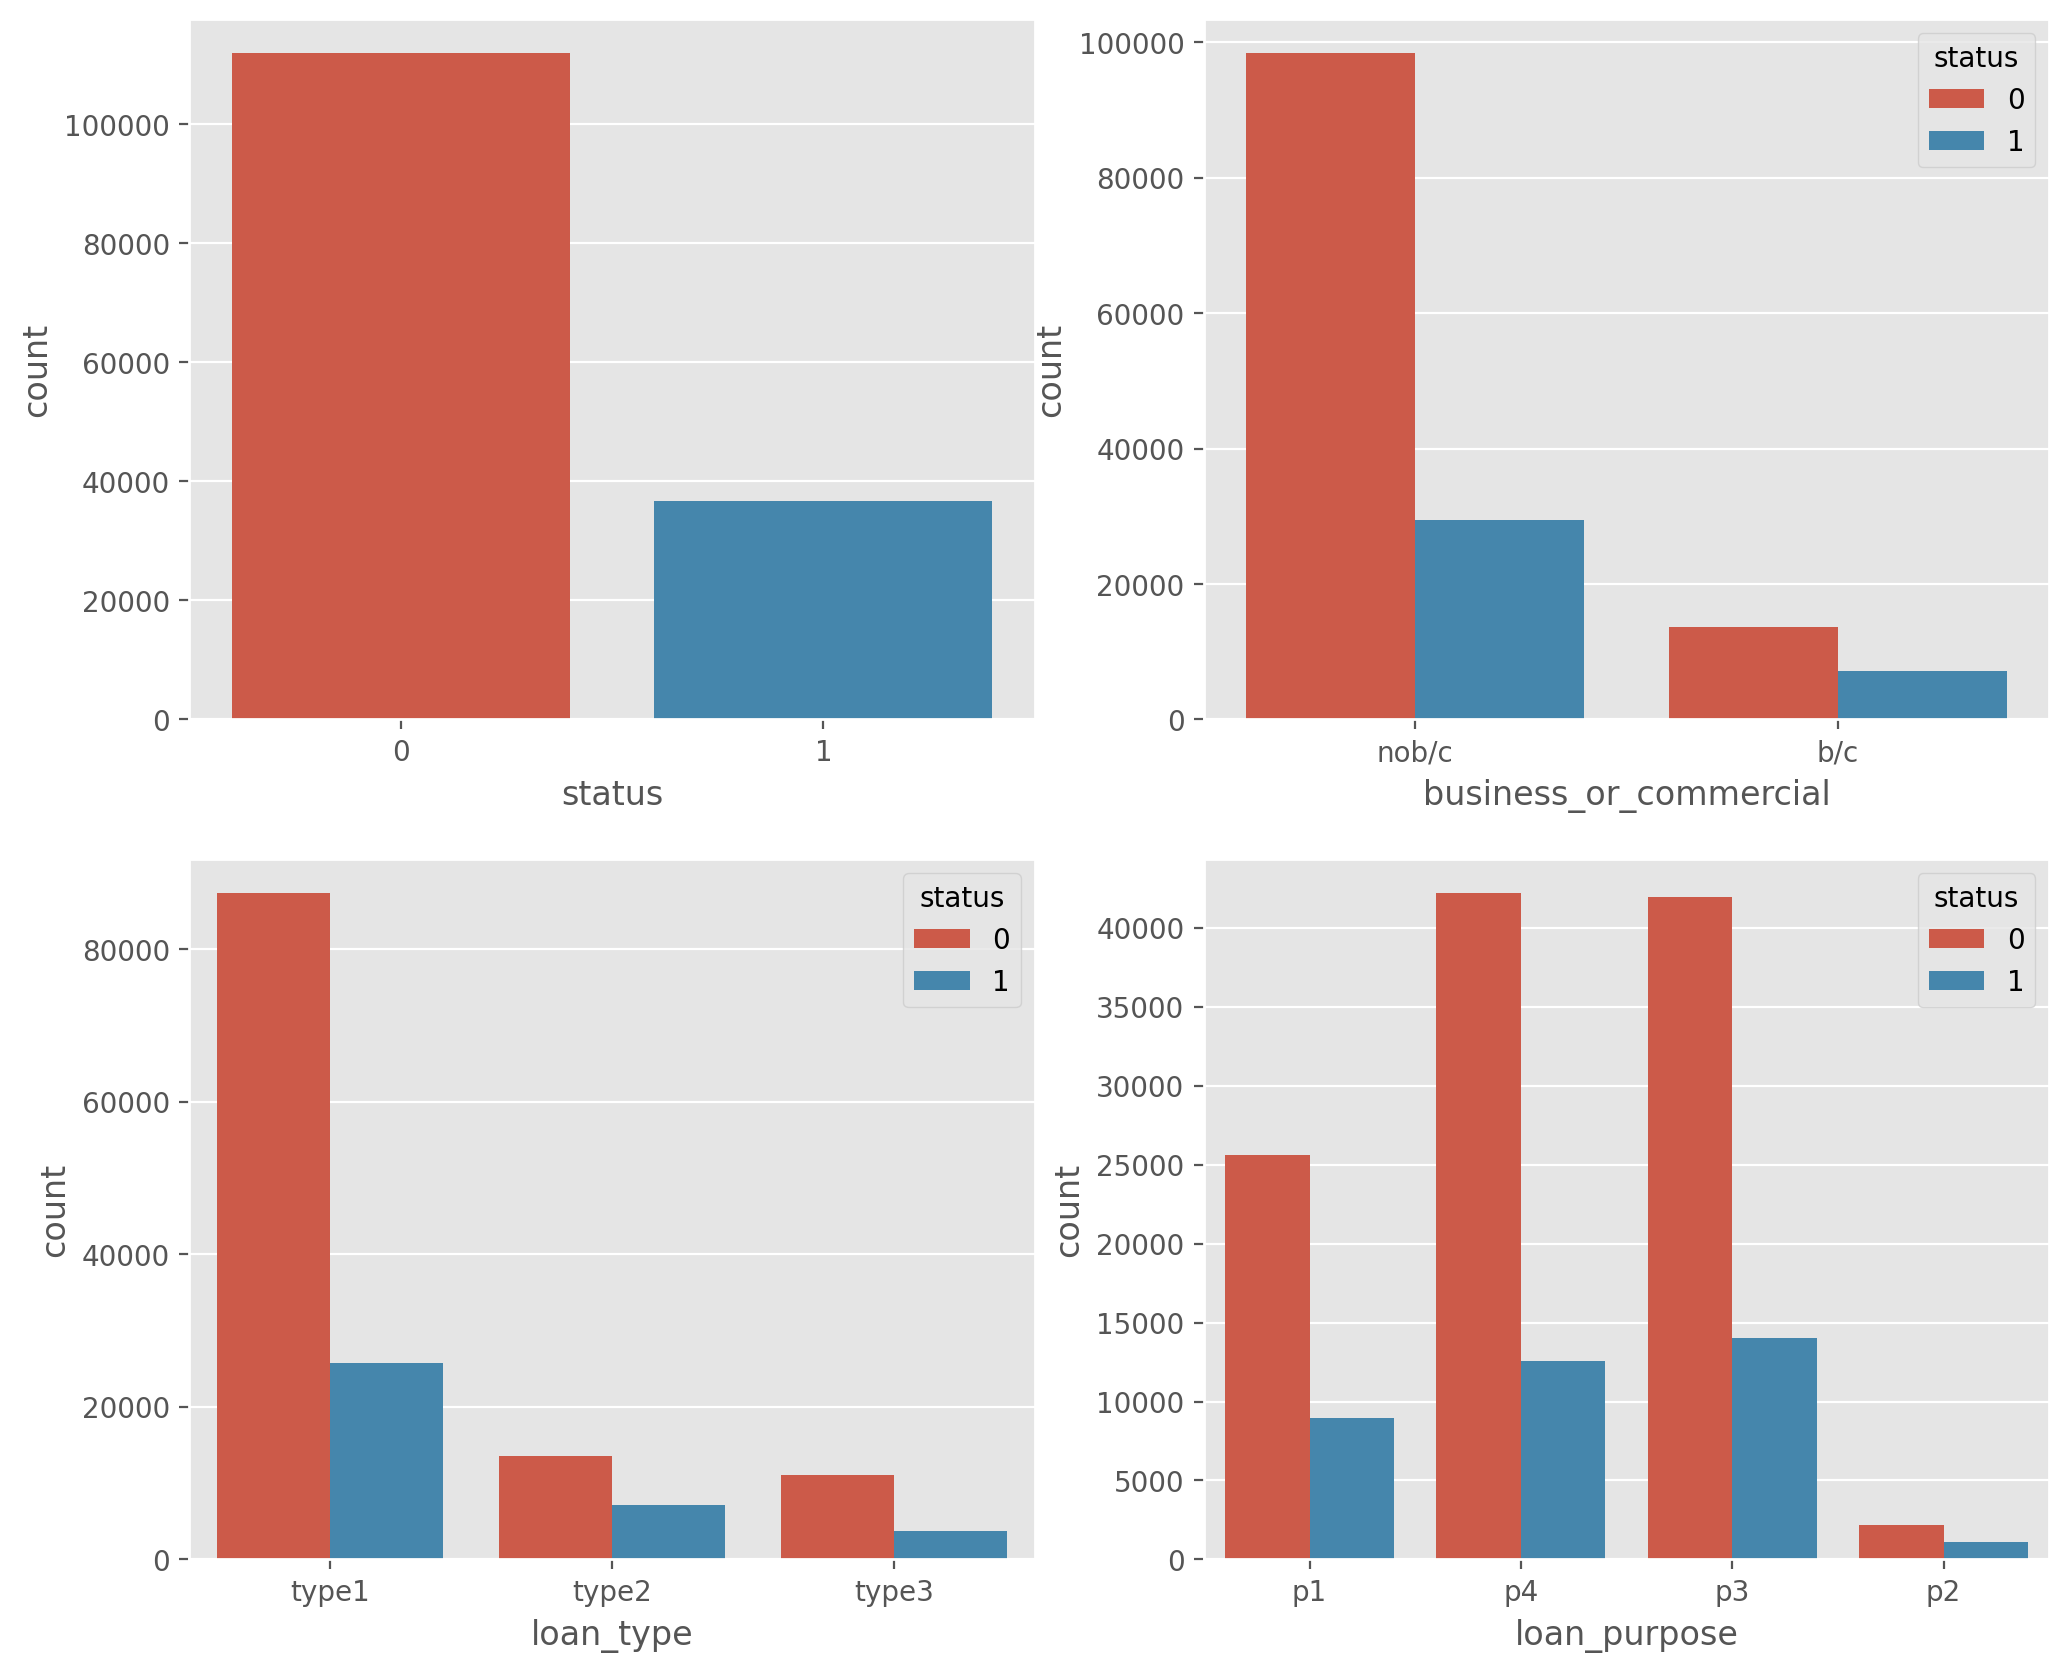

In [32]:
plt.figure(figsize=(12,10),dpi=200)
plt.subplot(2,2,1)
sns.countplot(data["status"])

plt.subplot(2,2,2)
sns.countplot(data["business_or_commercial"],hue=data.status)

plt.subplot(2,2,3)
sns.countplot(data["loan_type"],hue=data.status)

plt.subplot(2,2,4)
sns.countplot(data["loan_purpose"],hue=data.status)

## ==========================================================================

### Loan type, purpose, status, interest rate , loan amount etc

- The maximum loan amount approved is 3576500 and the minimum loan amount approved is 16500.
- Percentage of total loan applications approved is 24.64%.
- Highest interest rate for the loan approved is 5.5%, Lowest interest 3.125% and an average of 4.04% interest rate.
- Most of the people are applied for type1 loan .
- Highest number of applications received for the purpose of p3 and p4 category.
- only 13.97 Percentage of loan applications received for business or commercial purpose and remaining application for other 
  purposes

In [33]:
data.term.value_counts()

360.0    121685
180.0     12981
240.0      5859
300.0      2822
324.0      2766
120.0       510
144.0       263
348.0       260
336.0       213
96.0        194
312.0       185
156.0       174
216.0       115
276.0       100
132.0        93
288.0        90
168.0        82
228.0        74
204.0        59
264.0        43
108.0        33
192.0        17
252.0         8
165.0         1
280.0         1
322.0         1
Name: term, dtype: int64

In [34]:
data[data.status==1]["term"].value_counts()

360.0    29457
180.0     3154
300.0     1596
240.0     1220
324.0      703
120.0       93
348.0       53
144.0       46
96.0        40
336.0       39
156.0       33
312.0       30
276.0       27
132.0       26
216.0       26
228.0       18
168.0       18
204.0       16
288.0       13
264.0        7
108.0        5
192.0        2
165.0        1
280.0        1
Name: term, dtype: int64

In [35]:
data[data.status==1]["credit_type"].value_counts()

EQUI    15297
CIB      7610
CRIF     7127
EXP      6605
Name: credit_type, dtype: int64

## ==========================================================================

### credit_type and term :

- More than 1,20,000 loan applications have received for a term of 360 which is the highest and only around 30000 applications
  are accepted.
- For those whose loans are sanctioned 15297 loans were given under EQUI. Equifax is a credit bureau that collects information
  about an individual's credit history to create a credit report

In [36]:
data[data.status==1].groupby("credit_type")["credit_score"].min()

credit_type
CIB     500
CRIF    500
EQUI    500
EXP     500
Name: credit_score, dtype: int64

In [37]:
data[data.status==1].groupby("credit_type")["credit_score"].max()

credit_type
CIB     900
CRIF    900
EQUI    900
EXP     900
Name: credit_score, dtype: int64

In [38]:
print("Minimum property value among the loans approved : ",data[data["status"]==1]["property_value"].min())
print("Maximum property value among the loans approved : ",data[data["status"]==1]["property_value"].max())

Minimum property value among the loans approved :  8000.0
Maximum property value among the loans approved :  16508000.0


In [39]:
x=data[["credit_worthiness","secured_by","loan_amount","property_value","status"]].sort_values("property_value").head(50)
x

,credit_worthiness,secured_by,loan_amount,property_value,status
47807,l1,home,416500,8000.0,0
16951,l1,home,626500,8000.0,0
55286,l1,home,536500,8000.0,0
65238,l1,home,376500,8000.0,0
46287,l2,home,236500,8000.0,1
123343,l1,home,186500,8000.0,0
136556,l1,home,16500,18000.0,1
131734,l1,home,46500,28000.0,1
27473,l1,home,66500,28000.0,1
82307,l1,home,26500,28000.0,0


## ==========================================================================

### credit_score and property value
- The loans are approved for those whose credit score is between 500-900.
- The loans approved for properties having Minimum value of 8000.0 to a maximum value of 16508000.0

# Seperating the dataset into independent and dependent features

In [40]:
cols = ['loan_type','loan_purpose','age','secured_by','security_type','loan_amount', 'rate_of_interest','property_value','term','credit_score','income']
X = data[cols]
Y = data[['status']]

In [41]:
X.head()

,loan_type,loan_purpose,age,secured_by,security_type,loan_amount,rate_of_interest,property_value,term,credit_score,income
0,type1,p1,25-34,home,direct,116500,4.045476,118000.0,360.0,758,1740.0
1,type2,p1,55-64,home,direct,206500,4.045476,NaN,360.0,552,4980.0
2,type1,p1,35-44,home,direct,406500,4.560000,508000.0,360.0,834,9480.0
3,type1,p4,45-54,home,direct,456500,4.250000,658000.0,360.0,587,11880.0
4,type1,p1,25-34,home,direct,696500,4.000000,758000.0,360.0,602,10440.0


In [42]:
Y.head()

,status
0,1
1,1
2,0
3,0
4,0


In [43]:
print('Independent Feature Set Shape: ',X.shape)
print('dependent Feature Set Shape: ',Y.shape)

Independent Feature Set Shape:  (148670, 11)
dependent Feature Set Shape:  (148670, 1)


In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_type         148670 non-null  object 
 1   loan_purpose      148536 non-null  object 
 2   age               148470 non-null  object 
 3   secured_by        148670 non-null  object 
 4   security_type     148670 non-null  object 
 5   loan_amount       148670 non-null  int64  
 6   rate_of_interest  148670 non-null  float64
 7   property_value    133572 non-null  float64
 8   term              148629 non-null  float64
 9   credit_score      148670 non-null  int64  
 10  income            139520 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 12.5+ MB


In [45]:
X.isnull().sum()

loan_type               0
loan_purpose          134
age                   200
secured_by              0
security_type           0
loan_amount             0
rate_of_interest        0
property_value      15098
term                   41
credit_score            0
income               9150
dtype: int64

## Data preprocessing
- handling missing values using imputing
- applying scaling to regression columns
- applying encoding to classification columns

In [46]:
from sklearn.impute import SimpleImputer                                          # import the class
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')               # create an object
X[['property_value', 'income','term']] = imputer.fit_transform(X[['property_value', 'income','term']])            # tranform the data using object
X

,loan_type,loan_purpose,age,secured_by,security_type,loan_amount,rate_of_interest,property_value,term,credit_score,income
0,type1,p1,25-34,home,direct,116500,4.045476,118000.000000,360.0,758,1740.0
1,type2,p1,55-64,home,direct,206500,4.045476,497893.465696,360.0,552,4980.0
2,type1,p1,35-44,home,direct,406500,4.560000,508000.000000,360.0,834,9480.0
3,type1,p4,45-54,home,direct,456500,4.250000,658000.000000,360.0,587,11880.0
4,type1,p1,25-34,home,direct,696500,4.000000,758000.000000,360.0,602,10440.0
...,...,...,...,...,...,...,...,...,...,...,...
148665,type1,p3,55-64,home,direct,436500,3.125000,608000.000000,180.0,659,7860.0
148666,type1,p1,25-34,home,direct,586500,5.190000,788000.000000,360.0,569,7140.0
148667,type1,p4,45-54,home,direct,446500,3.125000,728000.000000,180.0,702,6900.0
148668,type1,p4,55-64,home,direct,196500,3.500000,278000.000000,180.0,737,7140.0


In [47]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
X[['age','loan_purpose']] = imputer.fit_transform(X[['age','loan_purpose']] )            
X

,loan_type,loan_purpose,age,secured_by,security_type,loan_amount,rate_of_interest,property_value,term,credit_score,income
0,type1,p1,25-34,home,direct,116500,4.045476,118000.000000,360.0,758,1740.0
1,type2,p1,55-64,home,direct,206500,4.045476,497893.465696,360.0,552,4980.0
2,type1,p1,35-44,home,direct,406500,4.560000,508000.000000,360.0,834,9480.0
3,type1,p4,45-54,home,direct,456500,4.250000,658000.000000,360.0,587,11880.0
4,type1,p1,25-34,home,direct,696500,4.000000,758000.000000,360.0,602,10440.0
...,...,...,...,...,...,...,...,...,...,...,...
148665,type1,p3,55-64,home,direct,436500,3.125000,608000.000000,180.0,659,7860.0
148666,type1,p1,25-34,home,direct,586500,5.190000,788000.000000,360.0,569,7140.0
148667,type1,p4,45-54,home,direct,446500,3.125000,728000.000000,180.0,702,6900.0
148668,type1,p4,55-64,home,direct,196500,3.500000,278000.000000,180.0,737,7140.0


In [48]:
X.isnull().sum()

loan_type           0
loan_purpose        0
age                 0
secured_by          0
security_type       0
loan_amount         0
rate_of_interest    0
property_value      0
term                0
credit_score        0
income              0
dtype: int64

In [49]:
Y.isnull().sum()

status    0
dtype: int64

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[['loan_amount', 'rate_of_interest', 'property_value', 'term','credit_score', 'income']] = scaler.fit_transform(X[['loan_amount', 'rate_of_interest', 'property_value', 'term','credit_score', 'income']])
X

,loan_type,loan_purpose,age,secured_by,security_type,loan_amount,rate_of_interest,property_value,term,credit_score,income
0,type1,p1,25-34,home,direct,0.028090,0.505684,0.006667,1.000000,0.6450,0.003007
1,type2,p1,55-64,home,direct,0.053371,0.505684,0.029691,1.000000,0.1300,0.008607
2,type1,p1,35-44,home,direct,0.109551,0.570000,0.030303,1.000000,0.8350,0.016385
3,type1,p4,45-54,home,direct,0.123596,0.531250,0.039394,1.000000,0.2175,0.020533
4,type1,p1,25-34,home,direct,0.191011,0.500000,0.045455,1.000000,0.2550,0.018044
...,...,...,...,...,...,...,...,...,...,...,...
148665,type1,p3,55-64,home,direct,0.117978,0.390625,0.036364,0.318182,0.3975,0.013585
148666,type1,p1,25-34,home,direct,0.160112,0.648750,0.047273,1.000000,0.1725,0.012341
148667,type1,p4,45-54,home,direct,0.120787,0.390625,0.043636,0.318182,0.5050,0.011926
148668,type1,p4,55-64,home,direct,0.050562,0.437500,0.016364,0.318182,0.5925,0.012341


In [51]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X[['loan_type', 'loan_purpose', 'age', 'secured_by', 'security_type']]=encoder.fit_transform(X[['loan_type', 'loan_purpose', 'age', 'secured_by', 'security_type']])
X

,loan_type,loan_purpose,age,secured_by,security_type,loan_amount,rate_of_interest,property_value,term,credit_score,income
0,0.0,0.0,0.0,0.0,1.0,0.028090,0.505684,0.006667,1.000000,0.6450,0.003007
1,1.0,0.0,3.0,0.0,1.0,0.053371,0.505684,0.029691,1.000000,0.1300,0.008607
2,0.0,0.0,1.0,0.0,1.0,0.109551,0.570000,0.030303,1.000000,0.8350,0.016385
3,0.0,3.0,2.0,0.0,1.0,0.123596,0.531250,0.039394,1.000000,0.2175,0.020533
4,0.0,0.0,0.0,0.0,1.0,0.191011,0.500000,0.045455,1.000000,0.2550,0.018044
...,...,...,...,...,...,...,...,...,...,...,...
148665,0.0,2.0,3.0,0.0,1.0,0.117978,0.390625,0.036364,0.318182,0.3975,0.013585
148666,0.0,0.0,0.0,0.0,1.0,0.160112,0.648750,0.047273,1.000000,0.1725,0.012341
148667,0.0,3.0,2.0,0.0,1.0,0.120787,0.390625,0.043636,0.318182,0.5050,0.011926
148668,0.0,3.0,3.0,0.0,1.0,0.050562,0.437500,0.016364,0.318182,0.5925,0.012341


## Splitting the data into training and test sets

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 5)

In [53]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (111502, 11)
Training Labels Shape :  (111502, 1)
Testing Data Shape    :  (37168, 11)
Testing Labels Shape  :  (37168, 1)


## Fitting the model with Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [55]:
pred_train=classifier.predict(x_train)
pred_test=classifier.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score
print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Set Accuracy : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.7533497157001668
Testing  Set Accuracy :  0.7550581145071029


In [57]:
y_test[:20]

,status
10042,0
99320,0
148540,0
104801,0
57295,0
93399,0
39060,1
50518,0
145461,0
44502,1


In [58]:
pred_train[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

## ----------------------------------------------------------------------------------------------------------------------------------
### Using the Logistic Regression model we got an accuracy of around 75% in both testing and training sets
## ----------------------------------------------------------------------------------------------------------------------------------

## Fitting the model with KKN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 12, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [60]:
print('Training Set Score : ', classifier.score(x_train, y_train))
print('Testing Set Score  : ', classifier.score(x_test, y_test))

Training Set Score :  0.8555990027084716
Testing Set Score  :  0.815055962117951


## ----------------------------------------------------------------------------------------------------------------------------------
### Using the KKN model we got an accuracy of around 85% in training sets and 81% in testing sets
## ----------------------------------------------------------------------------------------------------------------------------------
## Fitting the model with DecisionTreeClassifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [62]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score
print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Set Accuracy : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.9986816379975247
Testing  Set Accuracy :  0.9985740421868273


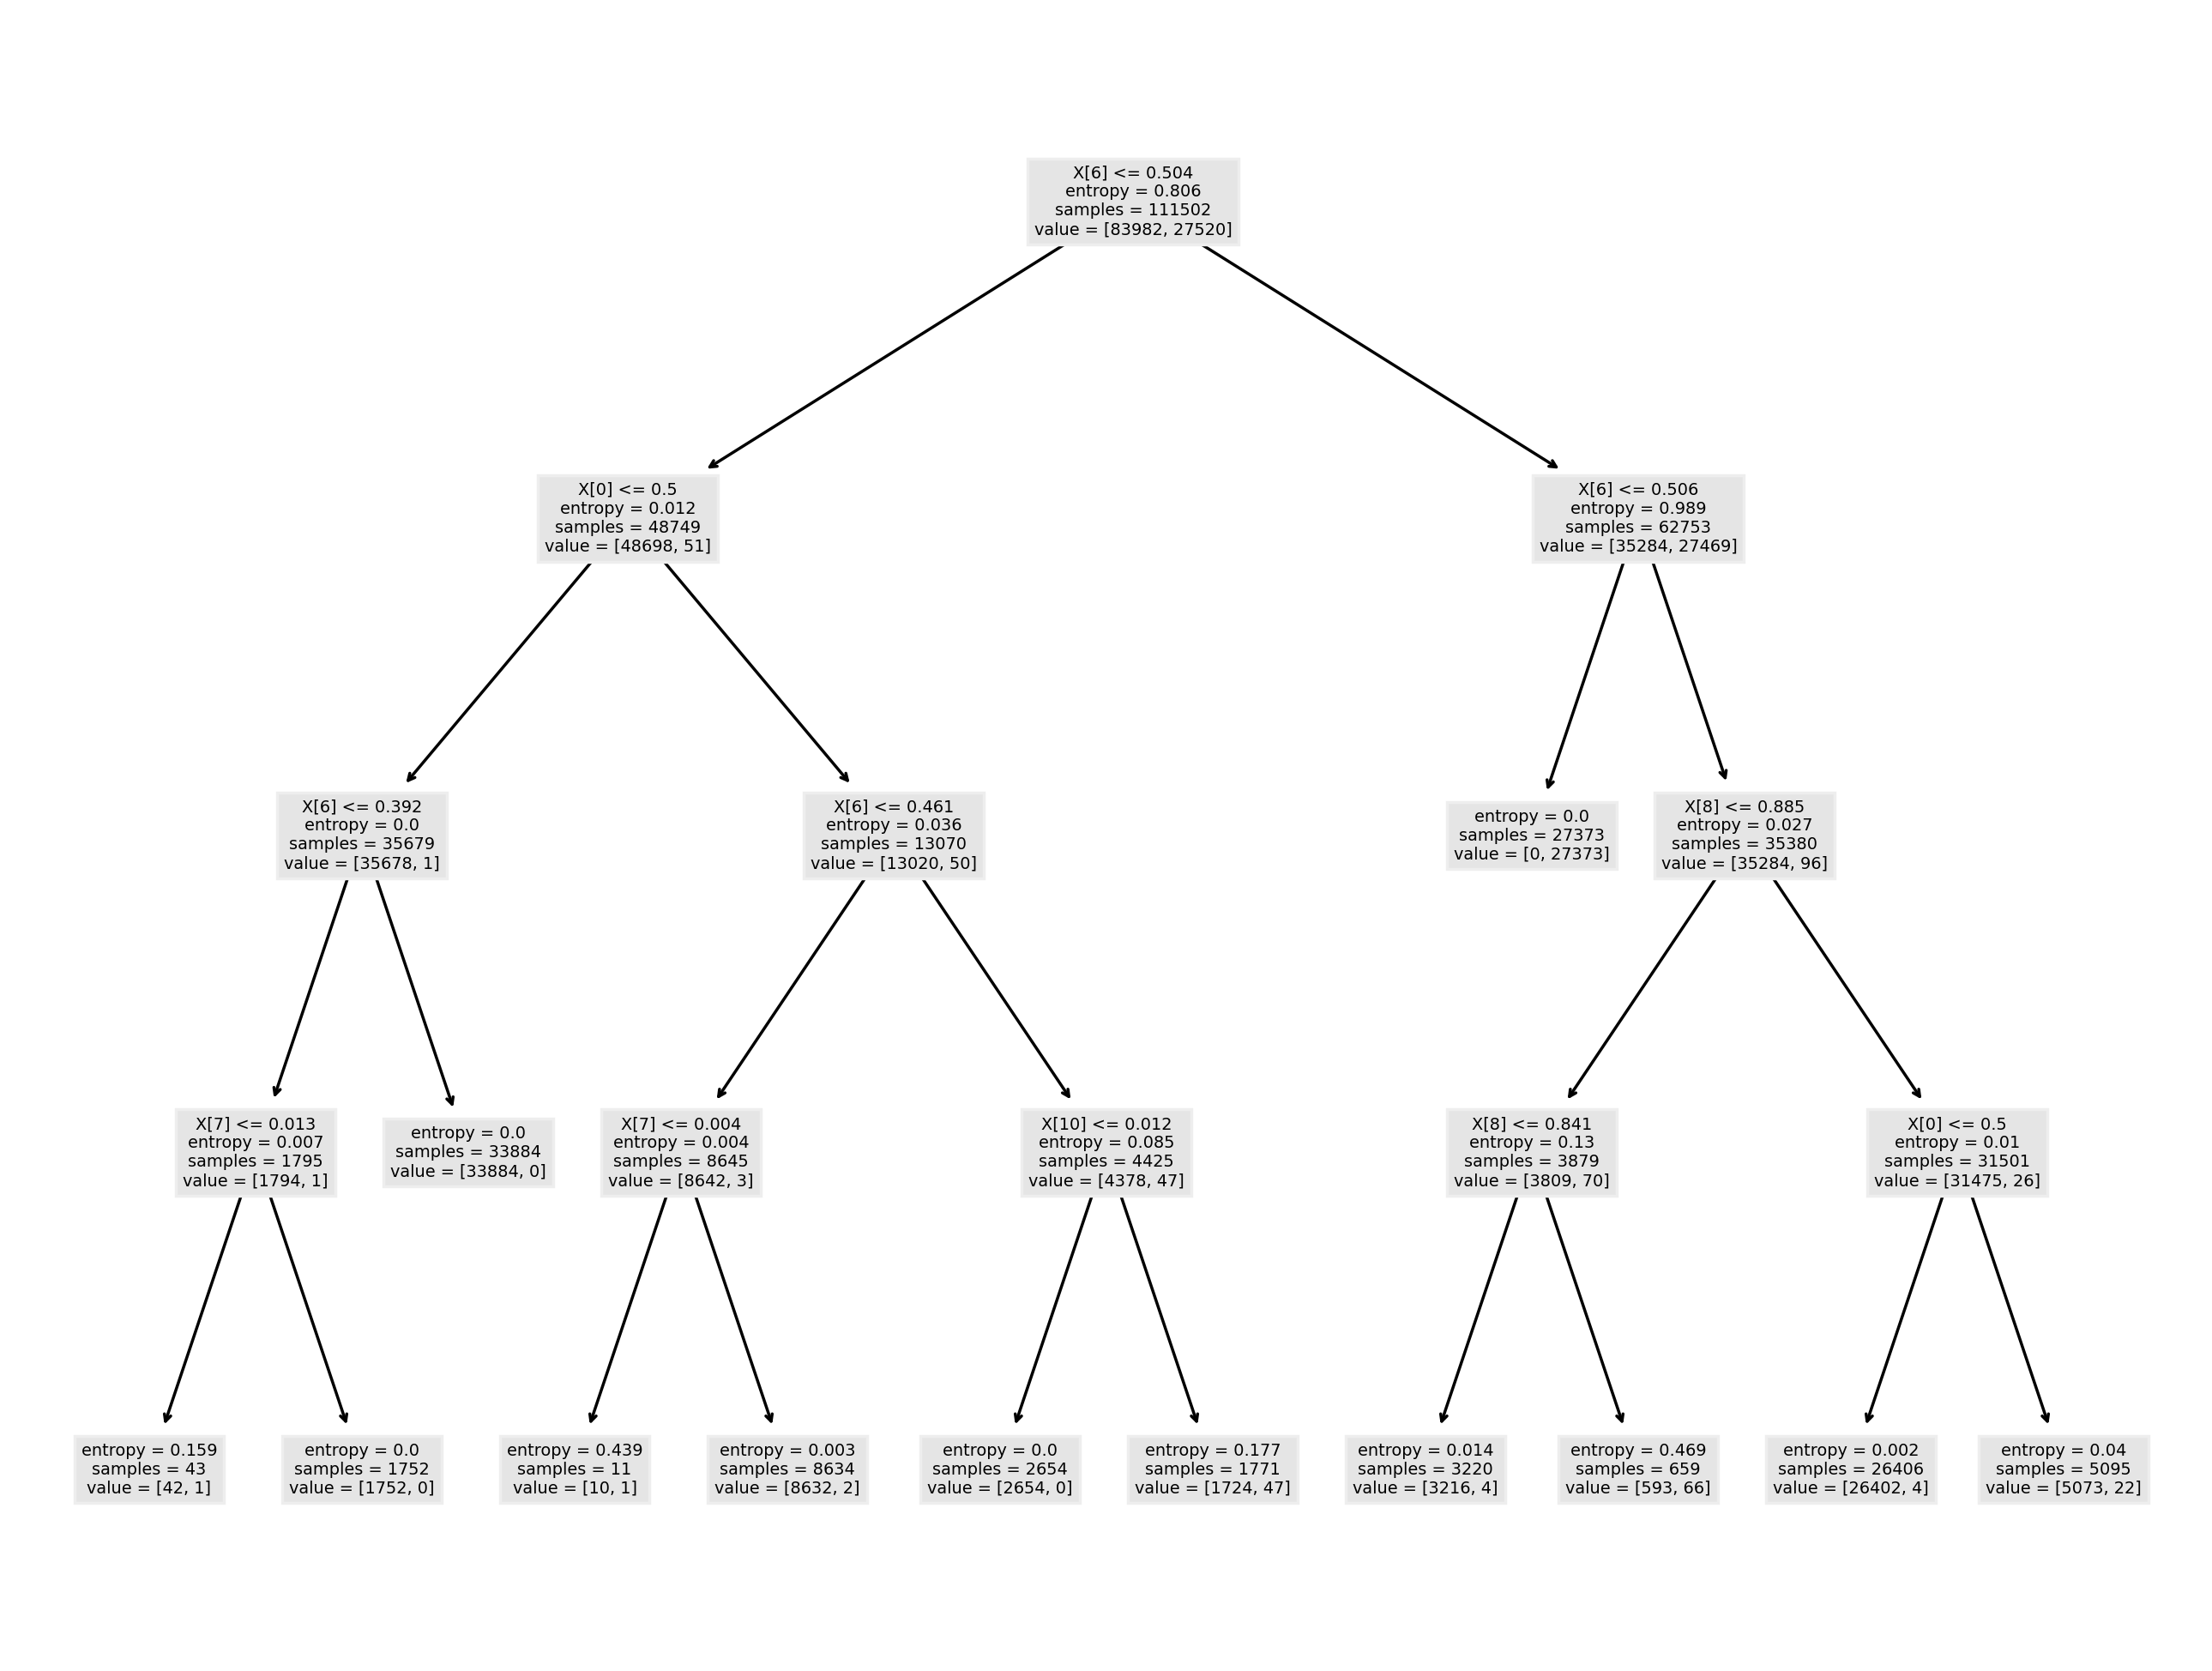

In [64]:
from sklearn.tree import plot_tree
plt.figure(dpi = 500)
plot_tree(classifier)
plt.show()

In [65]:
x_test[:5]

,loan_type,loan_purpose,age,secured_by,security_type,loan_amount,rate_of_interest,property_value,term,credit_score,income
10042,0.0,2.0,2.0,0.0,1.0,0.036517,0.562500,0.016970,1.0,0.3200,0.003318
99320,0.0,2.0,6.0,0.0,1.0,0.033708,0.546875,0.018182,1.0,0.0625,0.003941
148540,0.0,1.0,1.0,0.0,1.0,0.050562,0.623750,0.015152,1.0,0.0650,0.024370
104801,0.0,2.0,3.0,0.0,1.0,0.067416,0.421875,0.039394,1.0,0.4050,0.006741
57295,0.0,2.0,4.0,0.0,1.0,0.050562,0.453125,0.022424,1.0,0.7700,0.009748


In [66]:
y_test[:10]

,status
10042,0
99320,0
148540,0
104801,0
57295,0
93399,0
39060,1
50518,0
145461,0
44502,1


In [67]:
pred_test[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

## ----------------------------------------------------------------------------------------------------------------------------------
### Using the DecisionTreeClassifier we got an accuracy of around 100 % in both training and testing sets
## ----------------------------------------------------------------------------------------------------------------------------------

## Evaluating the model with using classification evaluation metrics

In [68]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, log_loss

In [70]:
pd.DataFrame(y_test).value_counts()

status
0         28049
1          9119
dtype: int64

In [71]:
pd.DataFrame(pred_test).value_counts()

0    28102
1     9066
dtype: int64

In [72]:
cm = confusion_matrix(y_test, pred_test)
cm

array([[28049,     0],
       [   53,  9066]], dtype=int64)

In [73]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


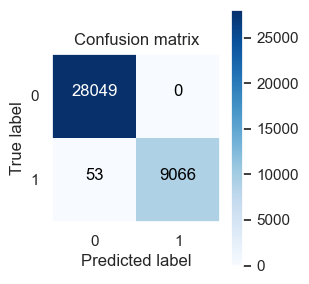

In [74]:
plt.figure(figsize = (3,3), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, [0, 1])

In [75]:
print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Set Accuracy : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.9986816379975247
Testing  Set Accuracy :  0.9985740421868273


In [76]:
precision_score(y_test, pred_test)

1.0

In [77]:
recall_score(y_test, pred_test)

0.9941879592060533

In [78]:
f1_score(y_test, pred_test)

0.9970855100357436

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28049
           1       1.00      0.99      1.00      9119

    accuracy                           1.00     37168
   macro avg       1.00      1.00      1.00     37168
weighted avg       1.00      1.00      1.00     37168



In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     83982
           1       1.00      0.99      1.00     27520

    accuracy                           1.00    111502
   macro avg       1.00      1.00      1.00    111502
weighted avg       1.00      1.00      1.00    111502

